# MATH50003 (2023–24)
# Lab 1: Introduction to Mathematical Computing

Numerical analysis primarily studies the mathematical construction and analysis of algorithms
for solving continuous problems like computing integrals or solving differential equations.
It is fundamental to the area to also understand how to implement such algorithms
in software. In year 1 you learned basic programming concepts such as loops, conditions,
functions, etc. and in this first lab we will employ these concepts in the implementation
of some basic algorithms you have already seen. In particular, we will look at implementing
the rectangular and triangular rules for approximating integrals.

We will use the Julia programming language which is in some ways similar to Python.
Julia is a _compiled language_ whereas Python is interpreted. It is also more adapted to the
implementation of algorithms in numerical analysis and scientific computing.
Being a compiled language means it will help us later on in the module understand exactly how
the computer functions when performing numerical calculations.

We have included exercises interspersed with the material which are highly recommended for
preparation for the computer-based exam later this term. Note each exercise comes with a
"unit-test".

------

## 1. Rectangular rules

One possible definition for an integral is the limit of a Riemann sum, for example:
$$
  ∫_0^1 f(x) {\rm d}x = \lim_{n → ∞} {1 \over n} ∑_{k=0}^{n-1} f(k/n).
$$
This suggests an algorithm known as the _left-sided rectangular rule_
for approximating an integral: choose $n$ large and then
$$
  ∫_0^1 f(x) {\rm d}x ≈ {1 \over n} ∑_{k=0}^{n-1} f(k/n).
$$
To implement this approximation in code we need to turn the sum into a for-loop.
Let's take as an example $f(x) = \exp(x)$. We can write:

In [1]:
n = 10000     # the number of terms in the summation
ret = 0.0     # ret will store the result, accumulated one argument at a time.
              # The .0 makes it a "real" rather than an "integer".
              # Understanding the "type" will be important later on.
for k = 0:n-1 # k will be equal to 0,1,…,n-1
    global ret
    ret = ret + exp(k/n) # add exp(k/n) to the result. Now ret = ∑_{j=0}^k f(j/n).
end           # in Julia for-loops are finished with an end
ret/n         # approximates the true answer exp(1) - exp(0) = ℯ-1 = 1.71828… to 4 digits

1.7181959157995244

It is convenient to wrap this in a function that takes in `f` and `n` and returns
the left-sided rectangular rule approximation. We can adapt the above routine into a function as follows:

In [2]:
function leftrectangularrule(f, n) # create a function named "leftrectangularrule" that takes in two arguments
    ret = 0.0
    for k = 0:n-1
        ret = ret + f(k/n) # now `f` is the function we put in
    end
    ret/n   # the last line of a function is returned
end # like for-loops, functions are finished with an end

leftrectangularrule(exp, 100_000_000) # Use n = 100 million points to get an approximation accurate to 8 digits.
                                      # The underscores in numbers are like commas and are ignored.

1.718281819867351

Note it is now easy to approximate other functions. For example, the following code computes the
integral of $x^2$:

In [3]:
function squared(x)
    x^2 # carets ^ mean "to the power of". This is actually a function that just calls x*x.
end
leftrectangularrule(squared, 10_000) # approximates 1/3 to 3 digits

0.33328333499999824

It is often inconvenient to name a function, and so we might want to integrate a function like $\cos(x^2)$
by making a so-called anonymous function:

In [4]:
leftrectangularrule(x -> cos(x^2), 10_000) # No nice formula! But I claim we got 4 digits

0.9045472213825267

------

**Exercise 1(a)** Complete the following function `rightrectangularrule(f, n)` That approximates
an integral using the right-sided rectangular rule:
$$
  ∫_0^1 f(x) {\rm d}x ≈ {1 \over n} ∑_{k=1}^n f(k/n).
$$

In [5]:
using Test # Loads the testing packages

function rightrectangularrule(f, n)
    # TODO: return (1/n) * ∑_{k=1}^n f(k/n) computed using a for-loop
end

# Change `@test_broken` to `@test` to check if your solution is correct
@test_broken rightrectangularrule(exp, 1000) ≈ exp(1) - 1 atol=1E-3 # tests that the approximation is accurate to 3 digits after the decimal point
@test_broken leftrectangularrule(exp, 1000) < exp(1) - 1 < rightrectangularrule(exp, 1000) # These two routines bound the true answer. Why is this?

Test Broken
  Expression: leftrectangularrule(exp, 1000) < exp(1) - 1 < rightrectangularrule(exp, 1000)

**Exercise 1(b)** Write a function `trapeziumrule(f, n)` That approximates
an integral using the trapezium rule:
$$
  ∫_0^1 f(x) {\rm d}x ≈ {1 \over n} \left[ f(0)/2 + ∑_{k=1}^{n-1} f(k/n) + f(1)/2 \right]
$$
Is it more or less accurate than the rectangular rules?

In [6]:
# TODO: write  a function trapeziumrule(f, n)

**Exercise 1(c)** Compare `leftrectangularrule`, `rightrectangularrule`, and `trapeziumrule`
for $f(x)$ equal to $cos(πx)$, $cos(3πx)$ and $sin(5πx)$ for $n = 1, 3, 5$. What do you notice?
Hint: It is possible to type `π` by typing `\pi` and then hitting the tab key. Otherwise one can just
type out `pi`.

------

## 2. Plotting errors in approximations

We have seen that rectangular and trapezium rules are a convenient way to approximate values of
integrals. We can ask the question: which method is the most accurate? A natural way to address this
question is to investigate the _rate_ of convergence. It is possible to prove rates of convergence
(something we will come back to in Part IV of the module) but it is often easier and more informative
to plot the error and deduce the rate experimentally.

Let's try with the `leftrectangularrule` routine. First we see how we can plot functions:

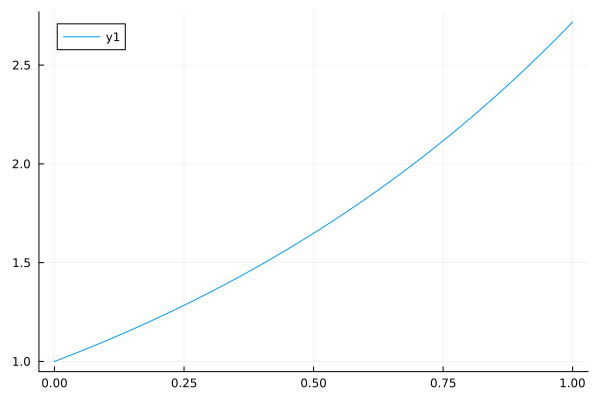

In [7]:
using Plots # Load the plotting package

m = 100 # number of plot points
x = range(0, 1; length=m) # makes a vector of a 100 points between 0 and 1
y = [exp(x[k]) for k=1:m] # Make a vector of `exp` evaluated at each point `x`.
plot(x, y)

We now plot the absolute value of the intgral approximated
by the left-hand rule compared to the "true" answer `exp(1)-1` as $n$ increases:

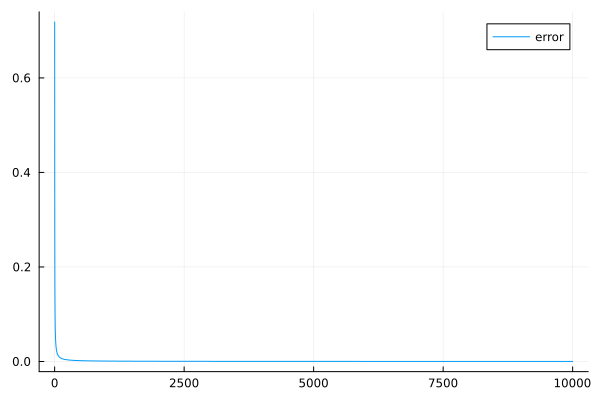

In [8]:
N = 10_000 # total number of points
errs = [abs(leftrectangularrule(exp,n)- (exp(1)-1)) for n=1:N]
plot(1:N, errs; label="error")

This plot is very indescriptive. We can get more information by scaling both the $x$- and $y$-axis logarithmically:

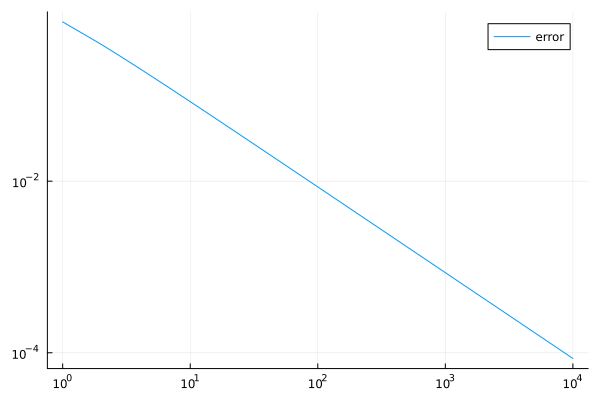

In [9]:
plot(1:N, errs; xscale=:log10, yscale=:log10, label="error")

We see with 10,000 points we get about $10^{-4}$ errors.
We can add to this plot reference curves corresponding to $n^{-1}$ and $n^{-2}$
to estimate the convergence rate:

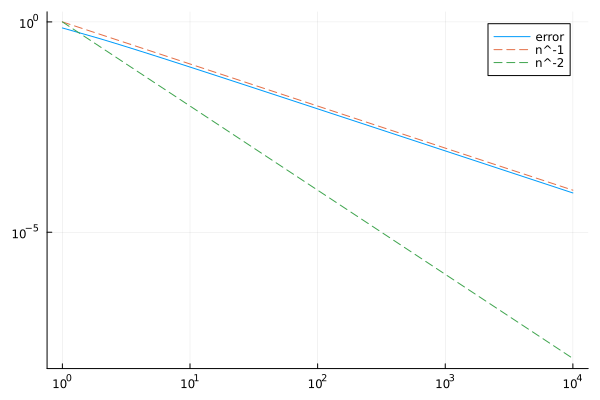

In [10]:
plot!(1:N, (1:N) .^ (-1); linestyle=:dash, label="n^-1") # exclamation point means add to existing plot
plot!(1:N, (1:N) .^ (-2); linestyle=:dash, label="n^-2") # exclamation point means add to existing plot

Since the error decays at the same rate as $n^{-1}$ we conclude that we can likely bound the error by
$C n^{-1}$ for some constant $C$.

------

**Exercise 2(a)** Estimate the convergence rate for `trapeziumrule` for $f(x) = \exp x$ by plotting the
error where the $x$- and $y$-axis are scaled logarithmically.

**Exercise 2(b)** Estimate the convergence rate for $f(x) = \exp(\cos(πx))$. Can you guess what property
of this function makes the convergence rate so fast?

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*